In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
class PCA:
  def __init__(self,n_components=None):
    self.n_components=n_components
    self.components=None
    self.mean=None
    self.explained_variance = None
    self.explained_variance_ratio = None

  def fit(self,X):
    X=np.array(X)
    #Centering dataset
    self.mean=np.mean(X,axis=0)

    X_centered = X - self.mean

    #finding covariance matrix
    cov_matrix=np.cov(X_centered,rowvar=False)
    #Finding eigenvalues and eigenvectors

    eigenvalues,eigenvectors=np.linalg.eigh(cov_matrix)
    #Sorting eigenvalues in descending order and getting their indicex
    idx=eigenvalues.argsort()[::-1]
    #Sorting eigenvalues in descending order
    eigenvalues=eigenvalues[idx]
    #Sorting eigenvalues in descending order
    eigenvectors=eigenvectors[:,idx]

    if self.n_components is None:
      self.n_components = X.shape[1]
    self.components = eigenvectors[:, :self.n_components]

    self.explained_variance = eigenvalues[:self.n_components]

    self.explained_variance_ratio = self.explained_variance / np.sum(eigenvalues)

    return self
  def transform(self, X):

    X_centered = X - self.mean

    return np.dot(X_centered, self.components)


  def fit_transform(self, X):

      return self.fit(X).transform(X)



In [16]:
np.random.seed(42)
X = np.random.randn(100, 5)  # 100 samples, 5 features
X[:, 0] = X[:, 1] + X[:, 2] + np.random.randn(100) * 0.1  # Make features correlated
pca=PCA(n_components=2)
X_reduced=pca.fit_transform(X)


Explained variance ratio of 2 components:  [0.53118288 0.18413672]
Sum of explained variance ratio of {i} components: 0.7153196032235389


Explained variance ratio of 3 components:  [0.53118288 0.18413672 0.14844901]
Sum of explained variance ratio of {i} components: 0.8637686147816719


Explained variance ratio of 4 components:  [0.53118288 0.18413672 0.14844901 0.135799  ]
Sum of explained variance ratio of {i} components: 0.9995676141264368




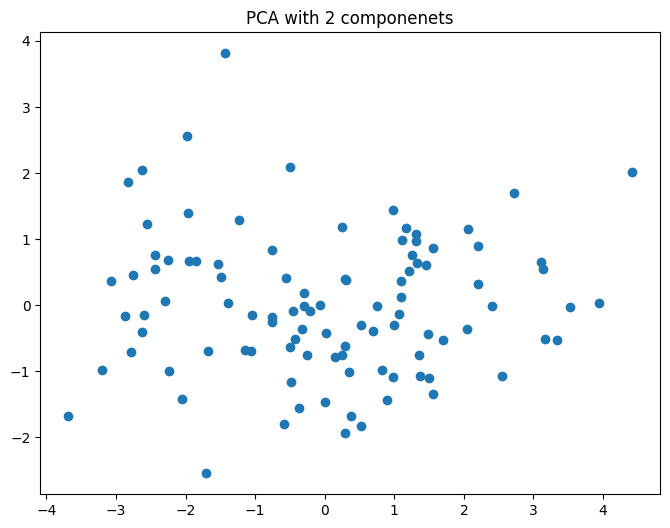

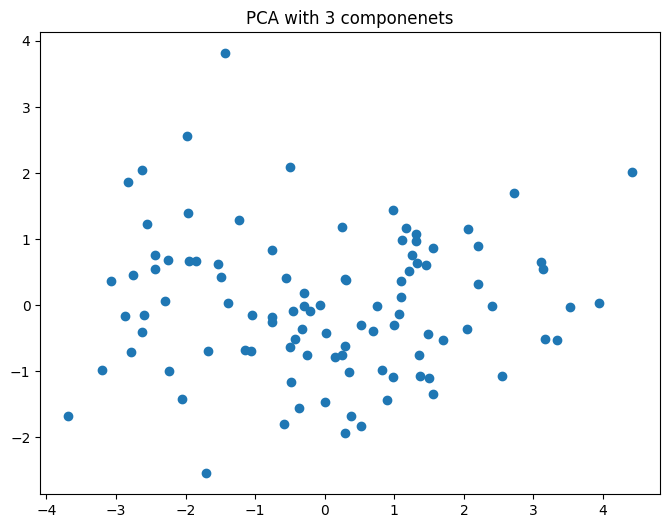

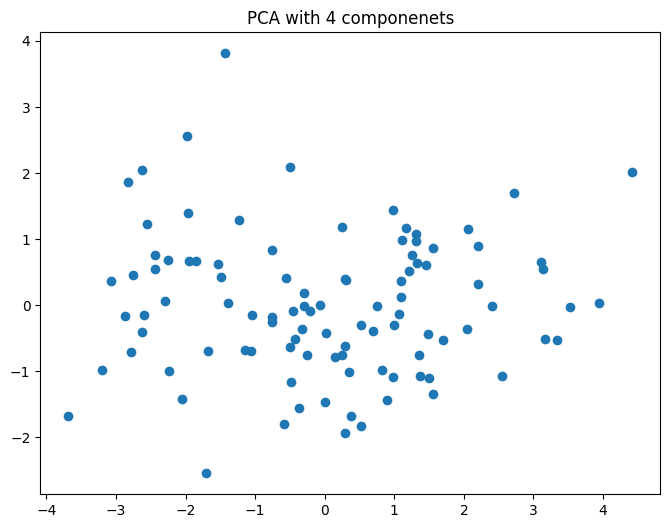

In [17]:
for i in range(2,5):

  pca=PCA(n_components=i)
  X_reduced=pca.fit_transform(X)
  print(f"Explained variance ratio of {i} components: ",pca.explained_variance_ratio)
  print("Sum of explained variance ratio of {i} components:", np.sum(pca.explained_variance_ratio))
  plt.figure(figsize=(8, 6))
  plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
  plt.title(f"PCA with {i} componenets")
  print("\n")